In [12]:
import pymatgen as pmg
import pymatgen.io.phonopy as phon
import pymatgen.phonon.plotter as pplt

# from pymatgen.io.vasp.outputs import Vasprun
# from pymatgen.electronic_structure.plotter import DosPlotter
# from pymatgen.core.periodic_table import Element
# from matplotlib.pyplot import figure

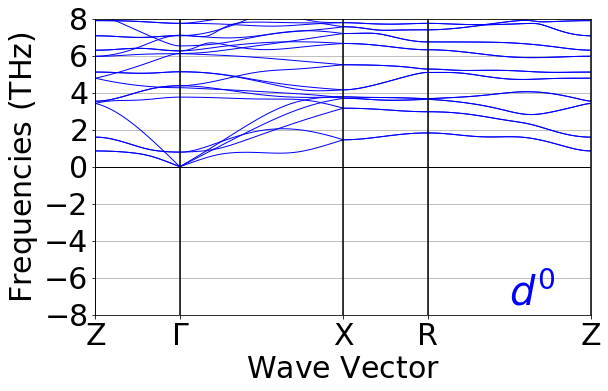

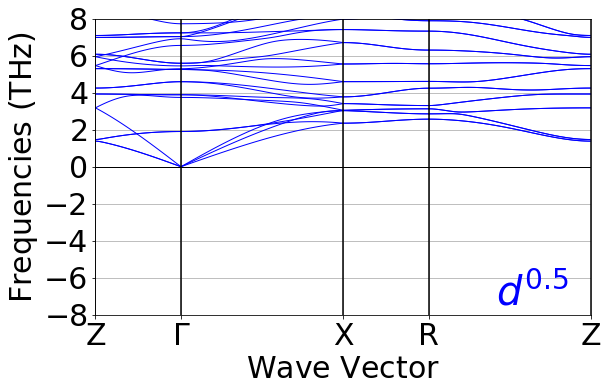

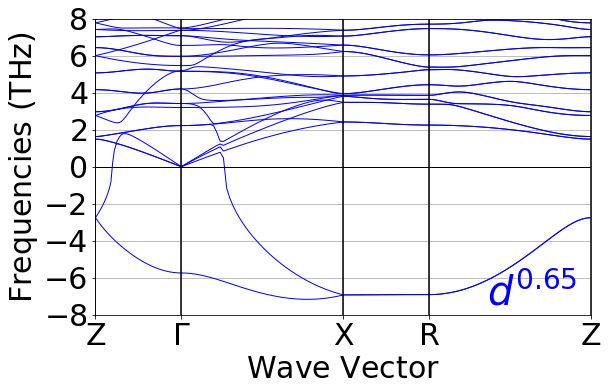

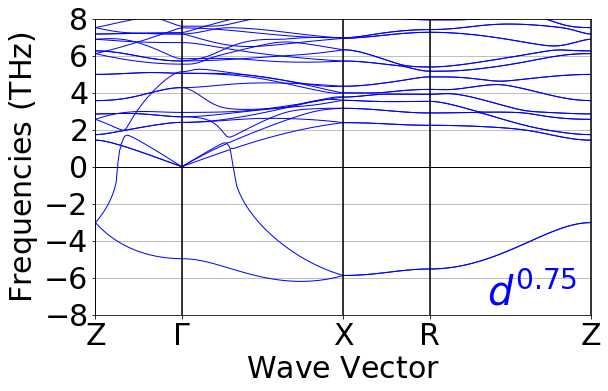

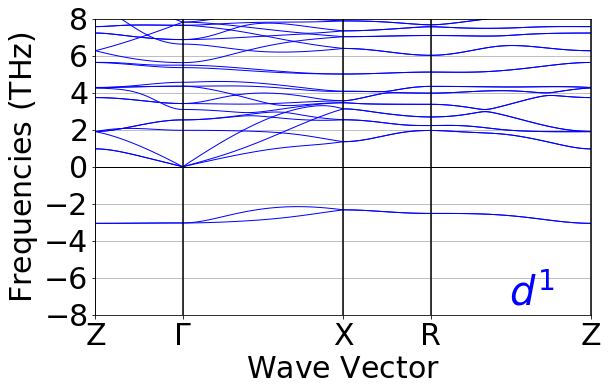

In [65]:
WIDTH = 8
HEIGHT = 5
PREFIX = "../../phonons"
SUFFIX = "band.yaml"
ITERS_1 = ["d0", "d05", "d065", "d075", "d1"]
DOPING_LABELS = ['$d^{0}$','$d^{0.5}$','$d^{0.65}$','$d^{0.75}$','$d^{1}$']
LABEL_FONT = 30

# Save the band structure objects referenced by iter for later use
bands = {}

# Specify the path through the BZ
bspath = {'Z':(0,0,0.5),'$\Gamma$':(0,0,0), 'X':(0,0.5,0),'R':(0,0.5,0.5)}

for i, iter_1 in enumerate(ITERS_1):
    
    ### Creating band struc from band.yaml files
    bs = phon.get_ph_bs_symm_line(f"{PREFIX}/{iter_1}/{SUFFIX}", labels_dict=bspath)
    bands.update({iter_1:bs})
    plotter = pplt.PhononBSPlotter(bs)
    band_plot = plotter.get_plot(ylim=[-8,8])
    
    ### Formatting
    band_plot.grid(1)
    fig = band_plot.gcf()
    fig.set_size_inches(WIDTH,HEIGHT)
    
    band_plot.text(0.88, 0, DOPING_LABELS[i], horizontalalignment='center', verticalalignment='bottom',\
         transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
    
    ### Displaying and saving
    band_plot.show()
    fig.savefig(f'band-plot-{iter_1}.png',dpi=500)
    fig.savefig(f'band-plot-vec-{iter_1}.pdf')

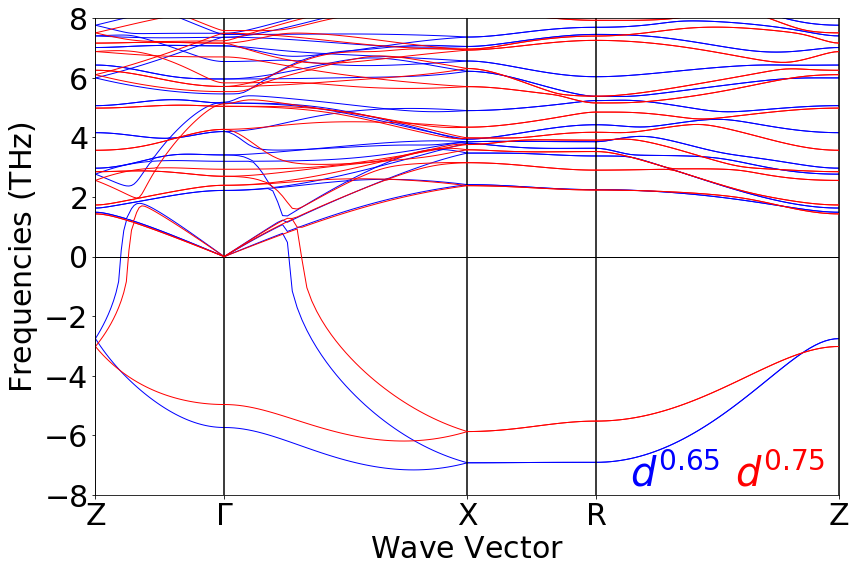

In [64]:
### Plotting some comparisons
# d0.65 vs d0.75
i1 = 2
i2 = 3

p1 = pplt.PhononBSPlotter(bands[ITERS_1[i1]])
p2 = pplt.PhononBSPlotter(bands[ITERS_1[i2]])
band_plot = p1.plot_compare(p2)

### Formatting
band_plot.ylim(-8,8)
band_plot.text(0.78, 0, DOPING_LABELS[i1], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
band_plot.text(0.92, 0, DOPING_LABELS[i2], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='red')

### Showing and saving
fig = band_plot.gcf()
fig.savefig(f'band-comp-{ITERS_1[i1]}-{ITERS_1[i2]}.png',dpi=500)
fig.savefig(f'band-comp-vec-{ITERS_1[i1]}-{ITERS_1[i2]}.pdf')
